In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/dataset.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
def tratar_nomes_colunas(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    df = df.rename(columns={"thinness__1-19_years":"thinness_till19",
                            "thinness_5-9_years": "thinness_till9", 
                            "schooling": "school"})
    return df

df = tratar_nomes_colunas(df)
print(df.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_till19',
       'thinness_till9', 'income_composition_of_resources', 'school'],
      dtype='object')


In [6]:
# Cria um dicionário com a descrição de cada variável
df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

## Análise Exploratória

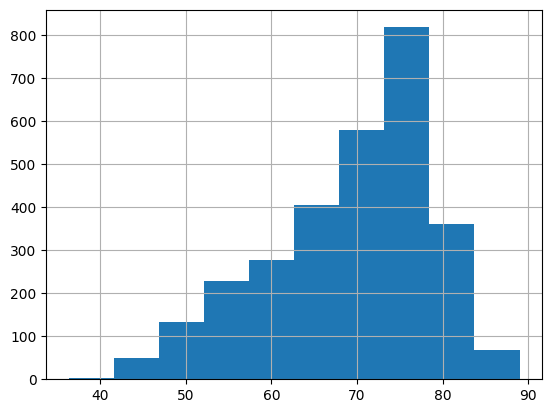

In [7]:
df['life_expectancy'].hist();

In [8]:
def dsa_get_pairs(data, alvo, atributos, n):
    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]
    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)
    return

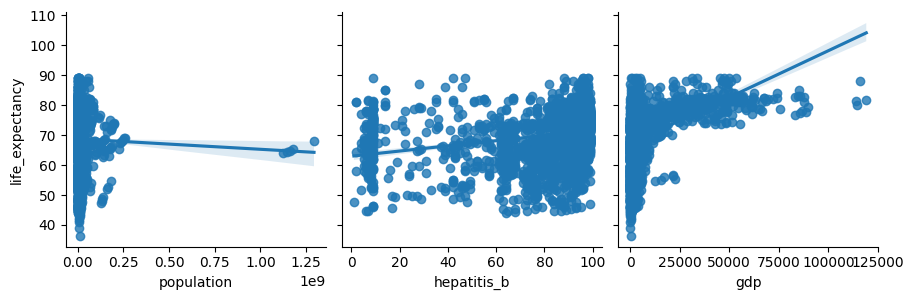

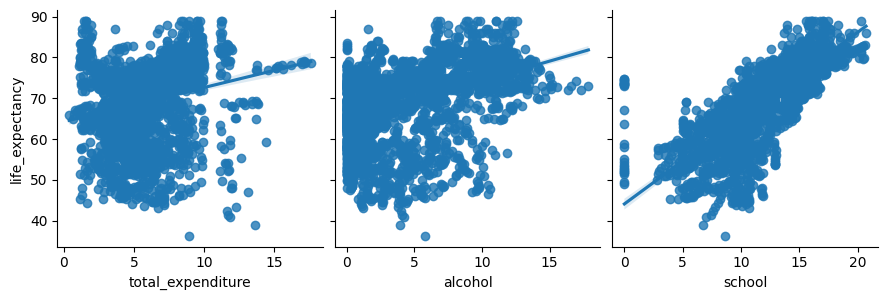

In [9]:
# Variável alvo
alvo = ['life_expectancy']

# Vamos usar alguns atributos
atributos = ['population', 'hepatitis_b', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

dsa_get_pairs(df, alvo, atributos, 3)

## Detectando Valores Ausentes

In [10]:
df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100

population                         22.191967
hepatitis_b                        18.822328
gdp                                15.248468
total_expenditure                   7.692308
alcohol                             6.603131
income_composition_of_resources     5.684139
school                              5.547992
thinness_till9                      1.157250
thinness_till19                     1.157250
bmi                                 1.157250
polio                               0.646698
diphtheria                          0.646698
life_expectancy                     0.340368
adult_mortality                     0.340368
hiv/aids                            0.000000
country                             0.000000
year                                0.000000
measles                             0.000000
percentage_expenditure              0.000000
infant_deaths                       0.000000
status                              0.000000
under-five_deaths                   0.000000
dtype: flo

In [11]:
df.describe(include='all')

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_till19,thinness_till9,income_composition_of_resources,school
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


## Detectando Outliers

Vamos analisar as variáveis que têm o maior percentual de valores ausentes.

In [12]:
# atributos com mais de 5% de valores ausentes
atributos = ['population', 'hepatitis_b', 'gdp', 'total_expenditure', 'alcohol', 'school'] 
novo_dataframe = df[atributos]

In [13]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = novo_dataframe.quantile(0.25)
Q3 = novo_dataframe.quantile(0.75)
IQR = Q3 - Q1

outliers = ((novo_dataframe < (Q1 - 1.5 * IQR)) | (novo_dataframe > (Q3 + 1.5 * IQR))).sum()
outliers

population           294
hepatitis_b          254
gdp                  365
total_expenditure     32
alcohol                0
school                44
dtype: int64

In [14]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame({'outliers': outliers, 'percentual': (outliers / len(novo_dataframe)) * 100})

# Retorna os resultados quando o valor for maior do que zero
outliers_summary[outliers_summary['outliers'] > 0]

,outliers,percentual
population,294,10.006807
hepatitis_b,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
school,44,1.497617


## Tratamento de Outliers

Decisão: Remover os outliers.

In [15]:
# Definindo os limites para filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [16]:
novo_dataframe.head()

,population,hepatitis_b,gdp,total_expenditure,alcohol,school
0,33736494.0,65.0,584.259210,8.16,0.01,10.1
1,327582.0,62.0,612.696514,8.18,0.01,10.0
2,31731688.0,64.0,631.744976,8.13,0.01,9.9
3,3696958.0,67.0,669.959000,8.52,0.01,9.8
4,2978599.0,68.0,63.537231,7.87,0.01,9.5


In [17]:
limite_inferior

population          -1.064106e+07
hepatitis_b          4.700000e+01
gdp                 -7.706370e+03
total_expenditure   -5.887500e-01
alcohol             -9.360000e+00
school               3.800000e+00
dtype: float64

In [18]:
# Filtrando os outliers
novo_df = df[~((novo_dataframe < limite_inferior) | (novo_dataframe > limite_superior)).any(axis = 1)]
novo_df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_till19,thinness_till9,income_composition_of_resources,school
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9


Considerações Importantes:

- A regra do 1.5 IQR é um método comum para identificar outliers, mas não é uma regra rígida.
- A escolha do multiplicador (1.5) pode variar em diferentes contextos e conjuntos de dados.
- É importante analisar visualmente a distribuição dos dados para confirmar a presença de outliers e ajustar os limites, se necessário.
- Outras técnicas para identificar outliers podem ser utilizadas em conjunto com a regra do IQR.

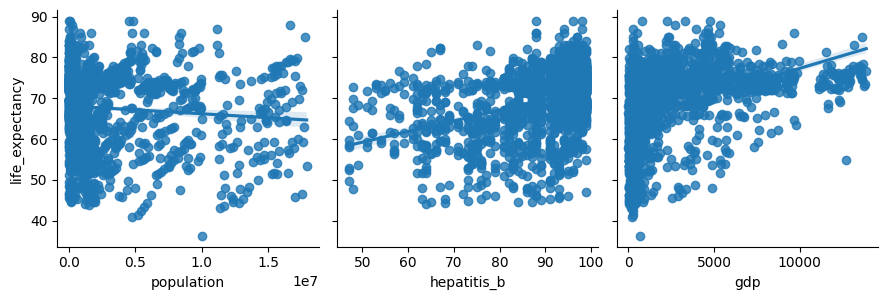

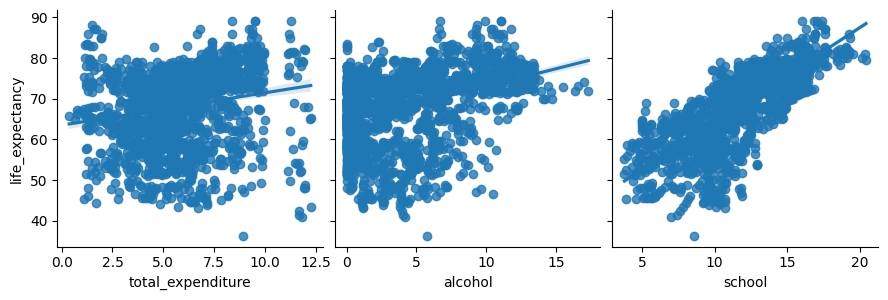

In [19]:
dsa_get_pairs(novo_df, alvo, atributos, 3)

## Tratamento de Valores Ausentes
Decisão: Preencher os valores ausentes com a mediana da variável.

In [20]:
novo_df.loc[:,'population']

1         327582.0
3        3696958.0
4        2978599.0
5        2883167.0
6         284331.0
           ...    
2932      129432.0
2933    12777511.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Name: population, Length: 2044, dtype: float64

In [21]:
def impute_median(dados):
    return dados.fillna(dados.median())

novo_df.loc[:,'population'] = novo_df['population'].transform(impute_median)
novo_df.hepatitisB = novo_df['hepatitis_b'].transform(impute_median)
novo_df.alcohol = novo_df['alcohol'].transform(impute_median)
novo_df.total_expenditure = novo_df['total_expenditure'].transform(impute_median)
novo_df.gdp = novo_df['gdp'].transform(impute_median)
novo_df.school = novo_df['school'].transform(impute_median)

novo_df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_till19,thinness_till9,income_composition_of_resources,school
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9


In [22]:
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

hepatitis_b                        19.129159
income_composition_of_resources     6.653620
thinness_till9                      0.587084
thinness_till19                     0.587084
bmi                                 0.587084
life_expectancy                     0.391389
adult_mortality                     0.391389
diphtheria                          0.146771
polio                               0.146771
dtype: float64 %


In [23]:
# Remove registros com valores nulos
novo_df.dropna(inplace = True)

In [24]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555 entries, 1 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1555 non-null   object 
 1   year                             1555 non-null   int64  
 2   status                           1555 non-null   object 
 3   life_expectancy                  1555 non-null   float64
 4   adult_mortality                  1555 non-null   float64
 5   infant_deaths                    1555 non-null   int64  
 6   alcohol                          1555 non-null   float64
 7   percentage_expenditure           1555 non-null   float64
 8   hepatitis_b                      1555 non-null   float64
 9   measles                          1555 non-null   int64  
 10  bmi                              1555 non-null   float64
 11  under-five_deaths                1555 non-null   int64  
 12  polio                    

In [25]:
# Drop das variáveis
novo_df.drop(['country', 'status'], axis = 1, inplace = True)

## Engenharia de Atributos

> As variáveis alcohol e bmi têm uma relação direta e natural. Vamos criar uma nova variável chamada life_style com a combinação dessas duas variáveis.

In [26]:
# Criando a nova variável
novo_df['lifestyle'] = novo_df['bmi'] * novo_df['alcohol']

In [27]:
novo_df['lifestyle'].describe()

count    1555.000000
mean      171.500168
std       197.243313
min         0.020000
25%        16.572000
50%        99.330000
75%       250.101500
max      1036.869000
Name: lifestyle, dtype: float64

In [28]:
valores_ausentes = novo_df.isnull().sum().sort_values(ascending=False)
valores_ausentes

year                               0
total_expenditure                  0
school                             0
income_composition_of_resources    0
thinness_till9                     0
thinness_till19                    0
population                         0
gdp                                0
hiv/aids                           0
diphtheria                         0
polio                              0
life_expectancy                    0
under-five_deaths                  0
bmi                                0
measles                            0
hepatitis_b                        0
percentage_expenditure             0
alcohol                            0
infant_deaths                      0
adult_mortality                    0
lifestyle                          0
dtype: int64

In [29]:
novo_df.dtypes

year                                 int64
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under-five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness_till19                    float64
thinness_till9                     float64
income_composition_of_resources    float64
school                             float64
lifestyle                          float64
dtype: object

## Análise de Correlação Para Verificar Multicolinearidade

Queremos que as variáveis preditoras tenham uma alta correlação com a variável alvo, mas não queremos que as variáveis preditoras tenham alta correlação entre si. Se houver alta correlação entre as variáveis preditoras isso é chamado de multicolinearidade e fere uma das suposições da regressão.

A correlação é uma medida da relação entre as variáveis. O coeficiente de correlação é um valor de -1 a +1, sendo:

**-1 indica alta correlação negativa.**

**+1 indica ata correlação positiva.**

**0 indica que não há correlação.**

Correlação não implica causalidade. Por exemplo: Sempre que aumenta o consumo de sorvete aumenta a presença de tubarões na praia. Provavelmente ambos os eventos ocorrem no verão e estão correlacionados, mas isso não significa que um evento causa o outro. Para afirmar isso teríamos que fazer uma análise de causalidade.

In [30]:
novo_df.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_till19,thinness_till9,income_composition_of_resources,school,lifestyle
year,1.000000,0.067718,-0.032177,-0.002300,-0.088693,0.042050,0.070478,-0.025722,-0.009863,0.000159,...,0.051680,0.081976,-0.115436,0.119252,0.055485,0.016484,0.019917,0.144950,0.105818,-0.061924
life_expectancy,0.067718,1.000000,-0.687888,-0.191520,0.279875,0.293053,0.361097,-0.016595,0.501977,-0.237021,...,0.101793,0.324677,-0.592976,0.336391,-0.101939,-0.389110,-0.394521,0.651719,0.688589,0.382896
adult_mortality,-0.032177,-0.687888,1.000000,0.092974,-0.087732,-0.164345,-0.221471,0.009145,-0.339008,0.122713,...,-0.039993,-0.165634,0.526444,-0.185279,0.123456,0.258154,0.268975,-0.410460,-0.403020,-0.170364
infant_deaths,-0.002300,-0.191520,0.092974,1.000000,-0.127250,-0.126023,-0.211949,0.554259,-0.239161,0.992850,...,-0.097756,-0.166616,0.042701,-0.128887,0.115906,0.256262,0.300307,-0.145315,-0.267800,-0.168143
alcohol,-0.088693,0.279875,-0.087732,-0.127250,1.000000,0.277984,0.188434,-0.025292,0.253346,-0.130342,...,0.213040,0.181525,0.003068,0.292772,0.031058,-0.358615,-0.343665,0.373892,0.482214,0.883526
percentage_expenditure,0.042050,0.293053,-0.164345,-0.126023,0.277984,1.000000,0.143670,-0.054435,0.230383,-0.131657,...,0.179319,0.113110,-0.053716,0.732120,-0.019783,-0.184731,-0.181108,0.277906,0.344190,0.319731
hepatitis_b,0.070478,0.361097,-0.221471,-0.211949,0.188434,0.143670,1.000000,-0.053585,0.151549,-0.239102,...,0.042859,0.684368,-0.115253,0.212755,-0.071064,-0.103093,-0.121082,0.323221,0.380944,0.188010
measles,-0.025722,-0.016595,0.009145,0.554259,-0.025292,-0.054435,-0.053585,1.000000,-0.102118,0.513907,...,-0.062721,-0.019112,0.000550,-0.044312,-0.007904,0.070983,0.070416,-0.020487,-0.069850,-0.058966
bmi,-0.009863,0.501977,-0.339008,-0.239161,0.253346,0.230383,0.151549,-0.102118,1.000000,-0.259128,...,0.129266,0.125535,-0.205510,0.277641,-0.064168,-0.538952,-0.550375,0.478367,0.530064,0.543186
under-five_deaths,0.000159,-0.237021,0.122713,0.992850,-0.130342,-0.131657,-0.239102,0.513907,-0.259128,1.000000,...,-0.094632,-0.191518,0.064869,-0.141549,0.131397,0.266349,0.310020,-0.172529,-0.296699,-0.176490


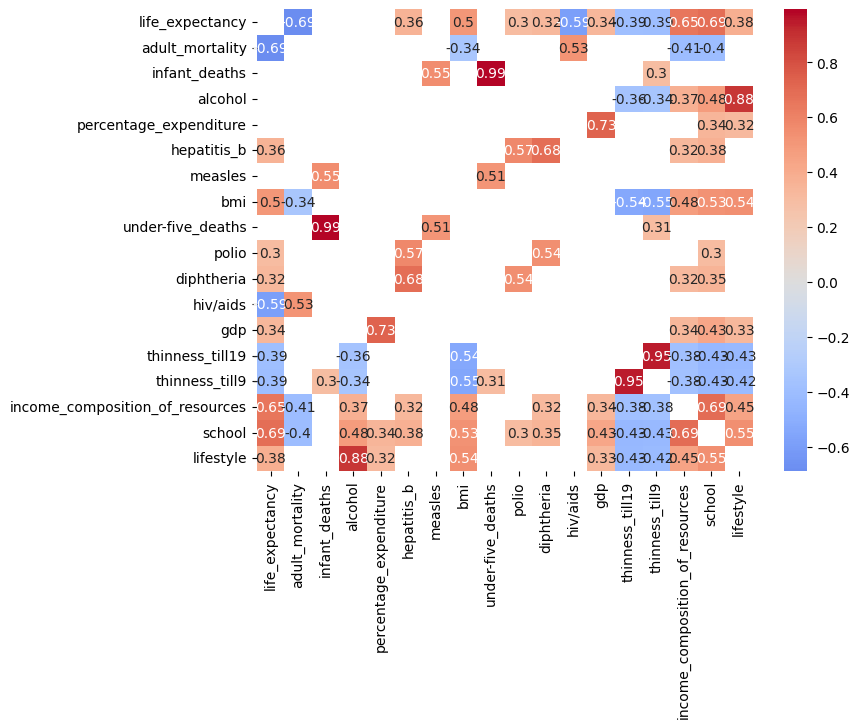

In [31]:
def dsa_filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):
    # Calcula a matriz de correlação
    corr = df.corr()
        # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()


dsa_filtrar_e_visualizar_correlacao(novo_df, threshold = 0.3, drop_column = None)

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso critério. São as variáveis preditoras com maior correlação com a variável alvo.

Agora devemos checar uma das suposições da Regressão Linear e identificar possíveis problemas de multicolinearidade (alta correlação entre as variáveis preditoras). Com base nesse critério eliminamos uma de duas variáveis preditoras altamente correlacionadas. Vamos considerar 0.65 como marca de corte. Vamos filtrar mais uma vez a matriz de correlação.

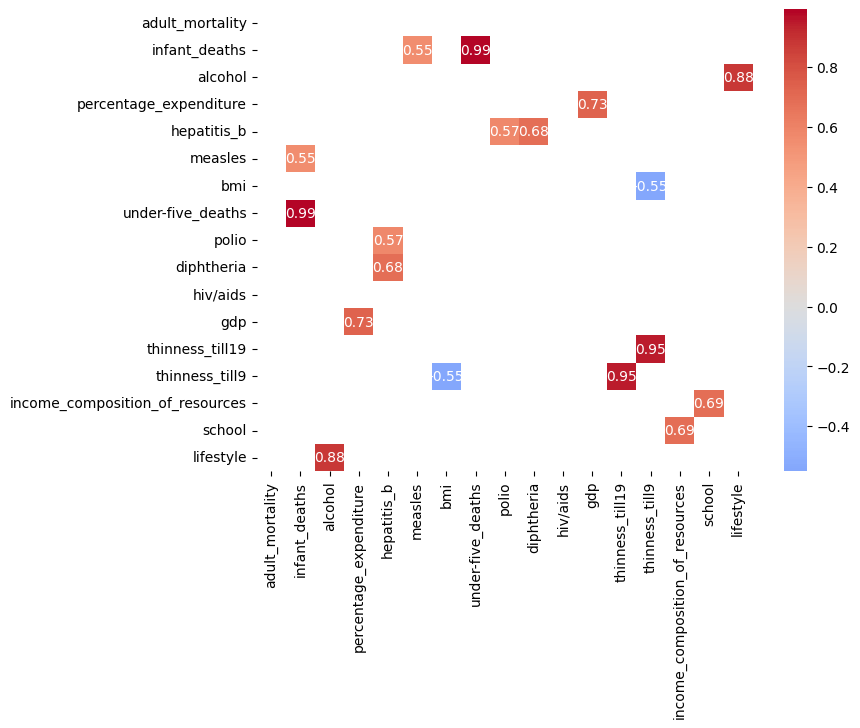

In [32]:
dsa_filtrar_e_visualizar_correlacao(novo_df, threshold = 0.55, drop_column = 'life_expectancy')

### Decisão

**Primeiro Filtro - Correlação com a Variável Alvo**

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso primeiro critério. São as variáveis preditoras com maior correlação com a variável alvo.

**Segundo Filtro - Multicolinearidade**

Com base no filtro de multicolinearidade, as variáveis adult_mortality, diphtheria, hiv, gdp, thinness_till19, school e lifestyle serão as variáveis mantidas para a modelagem estatística.

Nota: Manter a variável bmi ao invés da variável lifestyle também é uma decisão válida! 

In [33]:
novo_df.columns

Index(['year', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_till19', 'thinness_till9',
       'income_composition_of_resources', 'school', 'lifestyle'],
      dtype='object')

In [34]:
novo_df_final = novo_df[["life_expectancy", "adult_mortality", "diphtheria", "hiv/aids", "gdp", "thinness_till9", "school", "lifestyle"]]
novo_df_final.head()

,life_expectancy,adult_mortality,diphtheria,hiv/aids,gdp,thinness_till9,school,lifestyle
1,59.9,271.0,62.0,0.1,612.696514,17.5,10.0,0.186
3,59.5,272.0,67.0,0.1,669.959000,18.0,9.8,0.176
4,59.2,275.0,68.0,0.1,63.537231,18.2,9.5,0.172
5,58.8,279.0,66.0,0.1,553.328940,18.4,9.2,0.167
6,58.6,281.0,63.0,0.1,445.893298,18.7,8.9,0.162


Será que as variáveis que temos até aqui são todas relevantes para prever a variável alvo? Só tem uma forma de saber: verificando. E usaremos Machine Learning para isso.

## Seleção de Variáveis e Regularização

A seleção de variáveis e a regularização são duas abordagens em modelagem estatística e aprendizado de máquina que objetivam melhorar a qualidade dos modelos de regressão, especialmente quando se lida com um grande número de variáveis preditoras e para prevenir o sobreajuste.

Estas técnicas ajudam a identificar as variáveis mais significativas e a construir modelos mais generalizáveis.

## Seleção de Variáveis
A seleção de variáveis visa identificar o subconjunto mais relevante de variáveis preditoras que têm o maior impacto na variável dependente. Isso não apenas melhora a interpretabilidade do modelo, reduzindo a complexidade, mas também pode aumentar a precisão da previsão ao remover o ruído dos dados.

Métodos comuns de seleção de variáveis incluem:

* Seleção Manual: Baseia-se no conhecimento de domínio e na análise exploratória de dados para escolher as variáveis mais relevantes.

* Métodos de Filtro: Utilizam medidas estatísticas (como o teste chi-quadrado para classificação ou a correlação para regressão) para avaliar a importância de cada variável e selecionar aquelas que atendem a um certo critério.

* Métodos de Wrapper: Involvem a criação de vários modelos usando diferentes combinações de variáveis e selecionando o modelo com o melhor desempenho, com base em um critério específico, como o AIC (Critério de Informação de Akaike) ou o BIC (Critério de Informação Bayesiano). Exemplos incluem busca sequencial para frente, busca sequencial para trás e eliminação recursiva de atributos.

* Métodos de Incorporação: Realizam a seleção de variáveis como parte do processo de treinamento do modelo, ajustando os coeficientes das variáveis preditoras para penalizar a inclusão de variáveis irrelevantes. Exemplos incluem LASSO e Elastic Net.

Regularização


A regularização adiciona uma penalidade ao tamanho dos coeficientes na função de custo do modelo, o que ajuda a prevenir o sobreajuste, especialmente em modelos com grande número de variáveis. Isso força o modelo a manter os coeficientes tão pequenos quanto possível, o que pode melhorar a generalização do modelo para dados não vistos.

Os métodos de regularização mais comuns são:
* Ridge Regression (L2 Regularization): Adiciona uma penalidade igual ao quadrado da magnitude dos coeficientes à função de custo. Isso tende a reduzir o tamanho de todos os coeficientes, mas não os reduz a zero, o que significa que nenhum recurso é completamente eliminado do modelo.
* LASSO (Least Absolute Shrinkage and Selection Operator) (L1 Regularization): Adiciona uma penalidade proporcional ao valor absoluto da magnitude dos coeficientes. Isso pode reduzir alguns coeficientes a zero, efetivamente realizando seleção de variáveis e mantendo apenas os preditores mais significativos no modelo final.
* Elastic Net: Combina as penalidades L1 e L2, oferecendo o equilíbrio entre a seleção de variáveis de LASSO e a capacidade de encolher os coeficientes de Ridge. É particularmente útil quando há variáveis correlacionadas.

Qual o Método Usar?


A escolha entre usar seleção de variáveis, regularização, ou ambos, depende da situação específica, incluindo o número de variáveis, a presença de multicolinearidade, e se a interpretabilidade do modelo é uma preocupação.

A regularização pode ser especialmente útil em cenários com dados de alta dimensão ou quando o número de preditores é próximo ou maior que o número de observações, onde a seleção manual ou métodos de filtro podem não ser viáveis ou eficazes.

Tanto a seleção de variáveis como a regularização são técnicas valiosas que ajudam a construir modelos mais robustos e interpretáveis, melhorando a capacidade de generalização para novos dados.

A escolha do método ou a combinação de métodos depende das características específicas do conjunto de dados e dos objetivos de modelagem.

## Usando Machine Learning Para Encontrar as Variáveis Mais Relevantes

O algoritmo RandomForest, que é um tipo de algoritmo de aprendizado de máquina baseado em árvores de decisão, é considerado uma boa opção para encontrar as variáveis mais relevantes (ou "importantes") em um dataset por várias razões:

Redução de variância: O RandomForest combina várias árvores de decisão, cada uma construída com uma amostra aleatória do dataset. Isso ajuda a reduzir a variância e a evitar o overfitting, o que significa que o modelo pode generalizar melhor para novos dados.

Importância de variáveis: Durante a construção das árvores, o RandomForest avalia a importância de cada variável com base em quanto ela contribui para a melhoria da pureza dos nós (por exemplo, usando o ganho de informação ou a redução da impureza de Gini). Essa avaliação é agregada em todas as árvores para fornecer uma medida de importância para cada variável.

Robustez a ruídos e outliers: Como o RandomForest é baseado em árvores de decisão, ele é naturalmente robusto a ruídos e outliers nos dados. Isso o torna uma opção confiável para identificar variáveis importantes, mesmo em datasets com essas características.

Facilidade de interpretação: As medidas de importância de variáveis geradas pelo RandomForest são fáceis de interpretar, o que facilita a compreensão de quais variáveis são mais relevantes para a tarefa em questão.

Flexibilidade: O RandomForest pode lidar com diferentes tipos de dados (numéricos, categóricos) e é adequado para uma variedade de tarefas de aprendizado de máquina, como classificação e regressão.

Por essas razões, o RandomForest é frequentemente utilizado para selecionar as variáveis mais relevantes em um dataset, o que pode ajudar a simplificar o modelo e melhorar seu desempenho em tarefas de predição.

In [35]:
# Separando variáveis independentes (X) e dependente (y)
X = novo_df_final.drop('life_expectancy', axis = 1)
y = novo_df_final['life_expectancy']

In [36]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# Inicializando e treinando o RandomForestRegressor
modelo = RandomForestRegressor(n_estimators = 100, random_state = 42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Fazendo previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

In [41]:
# Avaliando o modelo
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print('R2 Score:', metrics.r2_score(y_test, y_pred))

RMSE: 1.8622691591770146
R2 Score: 0.9419181799469294


In [42]:
# Identificando a importância das variáveis
importancias = modelo.feature_importances_
variaveis = X.columns

In [43]:
# Dataframe das variáveis mais relevantes
importancias_df = pd.DataFrame({'Variável': variaveis, 
                                'Importância': importancias}).sort_values(by = 'Importância', 
                                                                          ascending = False)
importancias_df

,Variável,Importância
2,hiv/aids,0.515957
0,adult_mortality,0.277212
5,school,0.111888
4,thinness_till9,0.043182
6,lifestyle,0.025314
3,gdp,0.013417
1,diphtheria,0.013030


Os resultados mostram a importância relativa das variáveis no modelo RandomForest. A importância é uma medida de quanto cada variável contribui para a precisão do modelo. Aqui está uma interpretação dos resultados, ordenados do mais ao menos importante:

**HIV**: Esta é a variável mais importante, com uma contribuição de aproximadamente 60.71% para a performance do modelo. Isso indica que a prevalência do HIV no conjunto de dados tem o maior impacto na expectativa de vida, o que é consistente com o entendimento geral de que o HIV é uma grave questão de saúde pública que pode reduzir significativamente a expectativa de vida.

**Adult Mortality**: A mortalidade adulta é a segunda variável mais importante, contribuindo com cerca de 22.42% para a precisão do modelo. Isso sugere que as taxas de mortalidade entre adultos têm um impacto significativo na determinação da expectativa de vida, o que faz sentido, pois taxas mais altas de mortalidade adulta geralmente indicam condições de saúde e de vida piores.

**School**: A escolaridade aparece como a terceira variável em termos de importância, com 7.32%. Isso pode refletir o papel da educação na promoção de estilos de vida saudáveis e no acesso a melhores cuidados de saúde, ambos fatores que podem contribuir para uma maior expectativa de vida.

**Thinness till 19**: A magreza até os 19 anos tem uma importância de 3.78%, indicando uma relação menor, mas ainda assim relevante, com a expectativa de vida. Isso pode estar relacionado a questões nutricionais e de saúde durante os anos formativos, que podem ter efeitos duradouros na saúde geral.

**Lifestyle**: O estilo de vida tem uma contribuição de 3.12%, sugerindo que fatores relacionados ao estilo de vida, possivelmente capturados por esta variável, têm um impacto moderado na expectativa de vida.

**Diphtheria**: A importância da taxa de vacinação contra a difteria é relativamente baixa. No entanto, isso pode refletir altas taxas de imunização ou a eficácia dos tratamentos disponíveis.

**GDP**: O Produto Interno Bruto (PIB) tem a menor importância no modelo, com apenas 0.94%. Isso pode indicar que, dentro do conjunto de dados específico e no contexto das outras variáveis incluídas, a riqueza econômica do país é menos diretamente relacionada à expectativa de vida do que os fatores de saúde e educação.

Vamos remover do dataset a variável menos relevante, gdp nesse caso.

In [44]:
novo_df_final = novo_df_final.drop('gdp', axis = 1)

## Pré-Processamento dos Dados

In [46]:
novo_df_final.columns

Index(['life_expectancy', 'adult_mortality', 'diphtheria', 'hiv/aids',
       'thinness_till9', 'school', 'lifestyle'],
      dtype='object')

In [47]:
X = novo_df_final[['hiv/aids', 'adult_mortality', 'school', 'thinness_till9', 'lifestyle', 'diphtheria']].values
y = novo_df_final.life_expectancy.values.reshape(-1,1)

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
dsa_scaler = StandardScaler()

In [49]:
dsa_scaler.fit(x_treino)

StandardScaler()

In [50]:
x_treino_scaled = dsa_scaler.transform(x_treino)
x_teste_scaled = dsa_scaler.transform(x_teste)

## Modelagem Preditiva

Vamos criar mais de uma versão do modelo e escolher o melhor modelo de acordo com as métricas.

### Versão 1 do Modelo - Modelo Padrão Benchmark

In [51]:
modelo_dsa_v1 = LinearRegression()
modelo_dsa_v1.fit(x_treino_scaled, y_treino)

LinearRegression()

In [52]:
print("Coeficientes: \n", modelo_dsa_v1.coef_)

Coeficientes: 
 [[-2.50081104 -2.52665568  3.27105242 -0.24676687  0.31677252  0.55122328]]


In [53]:
y_pred_treino_v1 = modelo_dsa_v1.predict(x_treino_scaled)

In [54]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v1)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v1))

Mean Absolute Error: 2.885880433606237
Mean Squared Error: 14.200668650589934
Root Mean Squared Error: 3.768377455960315
R2 Score: 0.7628385053900261


## Avaliação do Modelo

Podemos calcular as métricas com os dados de treino como fizemos anteriormente, mas a avaliação do modelo sempre deve ser feita com dados que o modelo ainda não viu, dados de teste.

In [55]:
y_pred_teste_v1 = modelo_dsa_v1.predict(x_teste)

In [57]:
df_previsoes = pd.DataFrame({'Valor_Real': y_teste.flatten(), 'Valor_Previsto': y_pred_teste_v1.flatten()})
df_previsoes.head()

,Valor_Real,Valor_Previsto
0,74.2,-66.433335
1,62.7,-562.006773
2,78.0,-210.687505
3,58.8,-589.971803
4,75.5,-95.901651


In [58]:
y_pred_teste_v1 = modelo_dsa_v1.predict(x_teste_scaled)
df_previsoes = pd.DataFrame({'Valor_Real': y_teste.flatten(), 'Valor_Previsto': y_pred_teste_v1.flatten()})
df_previsoes.head()

,Valor_Real,Valor_Previsto
0,74.2,70.158171
1,62.7,64.037751
2,78.0,69.674194
3,58.8,61.062789
4,75.5,72.731183


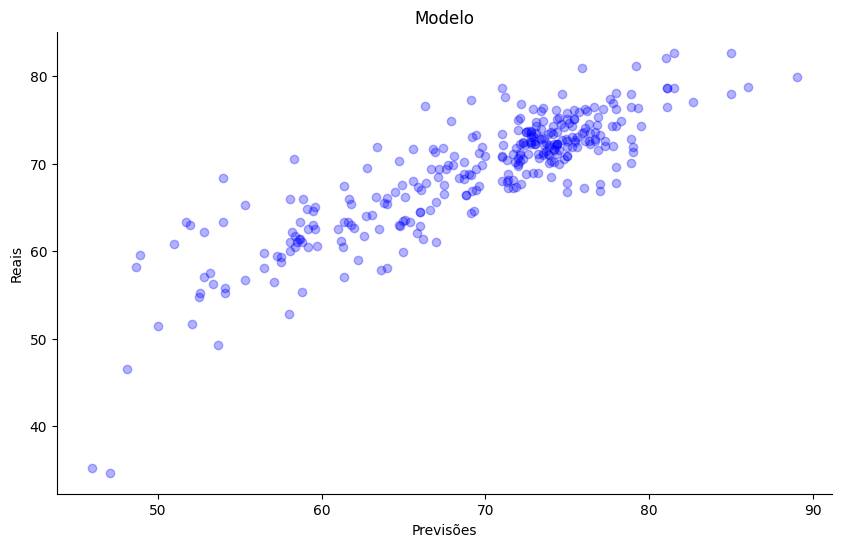

In [59]:
# Função para criar gráfico de dispersão
def dsa_cria_scatter(x, y, title, xlabel, ylabel):
    
    # Figura e subplots
    fig, ax = plt.subplots(figsize = (10, 6))
    
    # Scatter
    ax.scatter(x, y, color = "blue", alpha = 0.3)

    # Labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return

dsa_cria_scatter(df_previsoes.Valor_Real, df_previsoes.Valor_Previsto, 'Modelo', 'Previsões', 'Reais')

In [60]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v1)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v1))

Mean Absolute Error: 3.032241858748368
Mean Squared Error: 16.24605827968175
Root Mean Squared Error: 4.030639934263758
R2 Score: 0.7401740346305328


### Versão 2 do Modelo - Regressão Lasso (Regularização L1)

In [61]:
modelo_dsa_v2 = Lasso(alpha = 1.0)  
modelo_dsa_v2.fit(x_treino_scaled, y_treino)
y_pred_treino_v2 = modelo_dsa_v2.predict(x_treino_scaled)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v2)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v2))

Mean Absolute Error: 3.137338899820601
Mean Squared Error: 16.320054913887127
Root Mean Squared Error: 4.039808771945416
R2 Score: 0.7274432133635109


In [62]:
y_pred_teste_v2 = modelo_dsa_v2.predict(x_teste_scaled)

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v2)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v2))

Mean Absolute Error: 3.375954924771518
Mean Squared Error: 18.651076309813924
Root Mean Squared Error: 4.318689188841208
R2 Score: 0.7017101733878591


### Versão 3 do Modelo - Regressão Ridge (Regularização L2)

A regressão Ridge adiciona um termo de penalidade igual ao quadrado do tamanho dos coeficientes à função de custo. Isso força o modelo a manter os coeficientes pequenos, o que pode ajudar na redução do overfitting.

In [64]:
modelo_dsa_v3 = Ridge(alpha = 1.0)  


modelo_dsa_v3.fit(x_treino_scaled, y_treino)
y_pred_treino_v3 = modelo_dsa_v3.predict(x_treino_scaled)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v3)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v3))

Mean Absolute Error: 2.886034806570124
Mean Squared Error: 14.200680835396211
Root Mean Squared Error: 3.7683790726778286
R2 Score: 0.7628383018948992


In [65]:
y_pred_teste_v3 = modelo_dsa_v3.predict(x_teste_scaled)

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v3)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v3))

Mean Absolute Error: 3.0323273241444952
Mean Squared Error: 16.24526378438288
Root Mean Squared Error: 4.0305413760911675
R2 Score: 0.7401867411285925


### Versão 4 do Modelo - Regressão Elastic Net

Elastic Net é uma combinação das regularizações L1 e L2. Ela pode ser útil quando há múltiplas características correlacionadas. Elastic Net tem dois parâmetros para ajustar: um para a regularização L1 e outro para a L2. 

In [68]:
modelo_dsa_v4 = ElasticNet(alpha = 1.0, l1_ratio = 0.5)  
modelo_dsa_v4.fit(x_treino_scaled, y_treino)
y_pred_treino_v4 = modelo_dsa_v4.predict(x_treino_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v4)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v4))

Mean Absolute Error: 3.3302100444258436
Mean Squared Error: 17.931580039578286
Root Mean Squared Error: 4.23456964042136
R2 Score: 0.7005295717023794


In [69]:
y_pred_teste_v4 = modelo_dsa_v4.predict(x_teste_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v4)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v4))

Mean Absolute Error: 3.508295460717448
Mean Squared Error: 20.05424718643536
Root Mean Squared Error: 4.478196867762221
R2 Score: 0.6792690235827736


### Versão 5 do Modelo - Versão com Otimização de Hiperparâmetros

In [70]:
modelo_dsa_v5 = Ridge()
parametros = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_dsa = GridSearchCV(estimator = modelo_dsa_v5, 
                               param_grid = parametros, 
                               cv = 5, 
                               scoring = 'neg_mean_squared_error', 
                               verbose = 1)

grid_search_dsa.fit(x_treino_scaled, y_treino)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [72]:
melhor_modelo = grid_search_dsa.best_estimator_
y_pred_treino_v5 = melhor_modelo.predict(x_treino_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v5)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v5))

Mean Absolute Error: 2.886034806570124
Mean Squared Error: 14.200680835396211
Root Mean Squared Error: 3.7683790726778286
R2 Score: 0.7628383018948992


In [74]:
y_pred_teste_v5 = melhor_modelo.predict(x_teste_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v5)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v5))

Mean Absolute Error: 3.0323273241444952
Mean Squared Error: 16.24526378438288
Root Mean Squared Error: 4.0305413760911675
R2 Score: 0.7401867411285925


In [75]:
print('Melhor alpha:', grid_search_dsa.best_params_['alpha'])

Melhor alpha: 1


## Seleção do Modelo

In [76]:
print('RMSE V1:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v1)))
print('RMSE V2:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v2)))
print('RMSE V3:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v3)))
print('RMSE V4:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v4)))
print('RMSE V5:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v5)))

RMSE V1: 4.030639934263758
RMSE V2: 4.318689188841208
RMSE V3: 4.0305413760911675
RMSE V4: 4.478196867762221
RMSE V5: 4.0305413760911675


In [77]:
print('R2 Score Modelo V1:', metrics.r2_score(y_teste, y_pred_teste_v1))
print('R2 Score Modelo V2:', metrics.r2_score(y_teste, y_pred_teste_v2))
print('R2 Score Modelo V3:', metrics.r2_score(y_teste, y_pred_teste_v3))
print('R2 Score Modelo V4:', metrics.r2_score(y_teste, y_pred_teste_v4))
print('R2 Score Modelo V5:', metrics.r2_score(y_teste, y_pred_teste_v5))

R2 Score Modelo V1: 0.7401740346305328
R2 Score Modelo V2: 0.7017101733878591
R2 Score Modelo V3: 0.7401867411285925
R2 Score Modelo V4: 0.6792690235827736
R2 Score Modelo V5: 0.7401867411285925


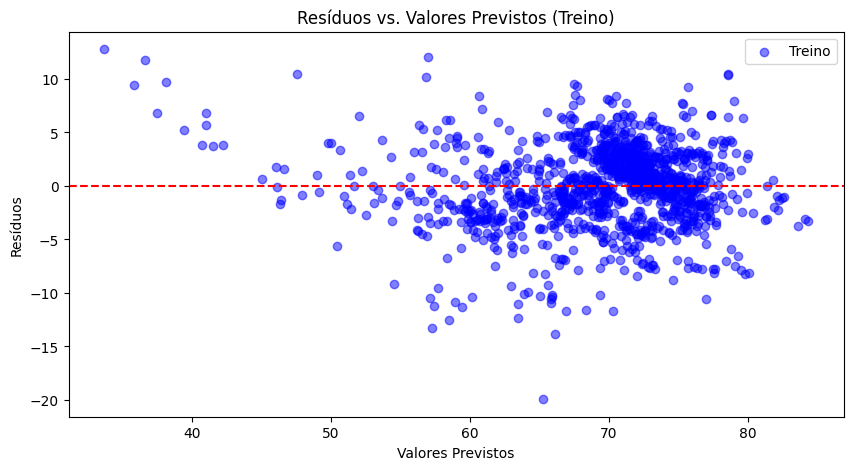

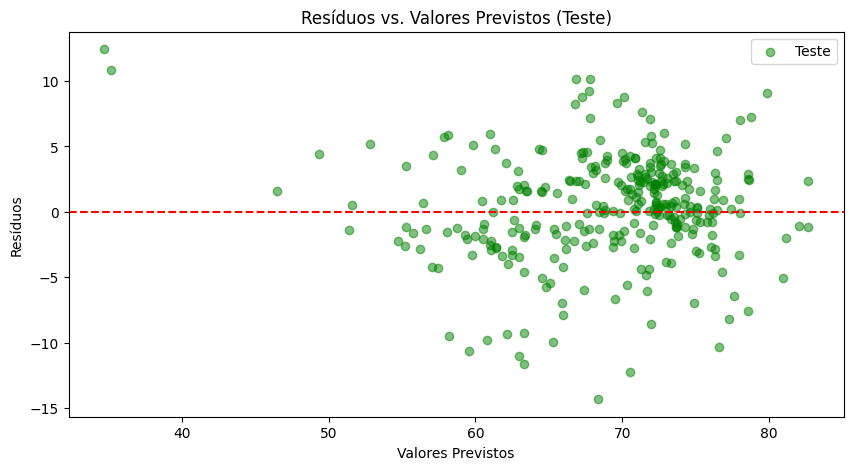

In [78]:
# Calculando os resíduos para o conjunto de treino
residuos_treino = y_treino - y_pred_treino_v1

# Calculando os resíduos para o conjunto de teste
residuos_teste = y_teste - y_pred_teste_v1

# Plotando os resíduos do conjunto de treino
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_treino_v1, residuos_treino, color = 'blue', label = 'Treino', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos (Treino)')
plt.legend()
plt.show()

# Plotando os resíduos do conjunto de teste
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_teste_v1, residuos_teste, color = 'green', label = 'Teste', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos (Teste)')
plt.legend()
plt.show()

Nestes gráficos, você está olhando para:

**Distribuição dos Resíduos**: Idealmente, os resíduos devem estar distribuídos aleatoriamente ao redor da linha horizontal y=0, indicando que o modelo está fazendo boas previsões em média em todas as faixas de valores.

**Padrões nos Resíduos**: Se você notar padrões específicos, como uma forma curvilínea ou uma dispersão crescente ou decrescente dos resíduos conforme os valores previstos aumentam, isso pode indicar problemas no modelo, como a necessidade de transformação nas variáveis ou a presença de heteroscedasticidade.

Nosso modelo está pronto para o deploy.

In [79]:
joblib.dump(dsa_scaler, 'dsa_scaler.pkl')
joblib.dump(modelo_dsa_v1, 'modelo_dsa_v1.pkl')

['modelo_dsa_v1.pkl']

## Deploy e Uso do Modelo Para Previsão com Novos Dados

In [80]:
scaler_final = joblib.load('dsa_scaler.pkl')
modelo_final = joblib.load('modelo_dsa_v1.pkl')

In [83]:
novos_dados = pd.read_csv('data/novos_dados.csv')

In [84]:
novos_dados_scaled = scaler_final.transform(novos_dados)

In [85]:
previsao = modelo_final.predict(novos_dados_scaled)

In [86]:
print('De acordo com os dados de entrada a expectativa de vida (em anos) é de aproximadamente:', 
      np.round(previsao, 2))

De acordo com os dados de entrada a expectativa de vida (em anos) é de aproximadamente: [[68.62]]
